In [1]:
import numpy as np
import pandas as pd
from scipy import optimize

import matplotlib.pyplot as plt

import multipletau

from kinetic_function import (fit_function,
                              read_csv_file, 
                              single_track_analysis
                             )

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:
PROTEIN_SIZE = 1300
DELTA_T = 0.5

# Single track analysis

In [4]:
# read one file
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie twiCrispr/"
file = "M142Het CJD1 ultrafast 0_10 in nc13 e1_Airyscan Processing/track_spot_table.csv"

datas = read_csv_file(path+file)

print(np.unique(datas.TRACK_ID))
datas.head()

[  4  12 108]


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MEAN_INTENSITY_CH1,MEDIAN_INTENSITY_CH1,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1
3,ID16896,16896,4,640.8803100585938,14.672849,2.816024,0.0,51.758672,103,0.27675532062103897,1,919.000000,713.0,278.0,3227.0,19299.0,636.5629583945331,0.2513738267762486,0.5800122059339992
4,ID17921,17921,4,456.7908020019531,17.063794,4.065223,0.0,100.502276,200,0.27675532062103897,1,725.238095,600.0,251.0,2185.0,15230.0,509.96077346810756,0.3119838047961062,0.6763592115546067
5,ID17410,17410,4,949.4459838867188,16.042649,2.971747,0.0,75.879219,151,0.27675532062103897,1,921.523810,729.0,412.0,1797.0,19352.0,451.3130420282156,0.30399919140190695,0.9520368938059725
6,ID18434,18434,4,568.4943237304688,17.398563,3.704569,0.0,117.085152,233,0.27675532062103897,1,697.333333,490.0,271.0,2258.0,14644.0,512.3118516424672,0.30594045057799285,0.6377486474863099
7,ID16387,16387,4,783.6535034179688,13.932617,4.801880,0.0,29.145660,58,0.27675532062103897,1,994.904762,647.0,400.0,2859.0,20893.0,677.574712099109,0.3237241423005037,0.7181776989750908


In [5]:
id_track = 4
x, y, x_auto, y_auto, elongation_r, translation_init_r = single_track_analysis(datas, 
                                                                               id_track, 
                                                                               delta_t = DELTA_T,
                                                                               protein_size=PROTEIN_SIZE)
print(elongation_r, translation_init_r)

35.13523850798275 1.4650891391835377


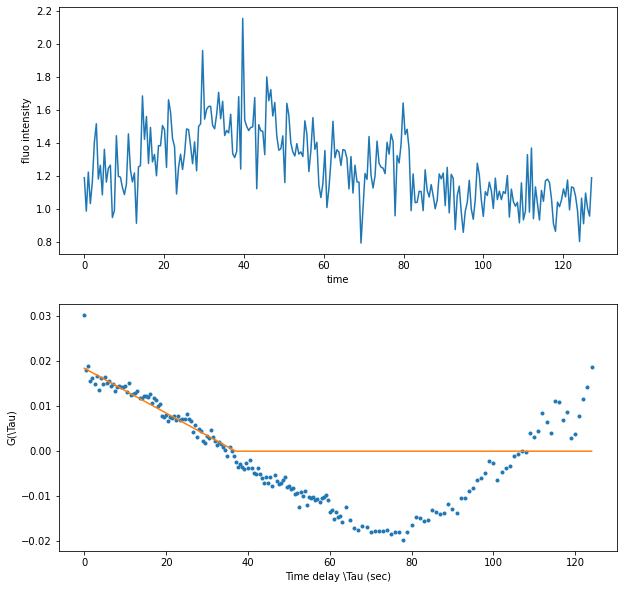

In [42]:
fig, ax = plt.subplots(2,1)
ax[0].plot(x,y)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

ax[1].plot(x_auto, y_auto, '.')
ax[1].plot(x_auto, fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
fig.set_size_inches((10,10))

# Multiple file analysis

In [47]:
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie twiCrispr/"
# path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie fast ilp4/"
files = [
    "M142Het CJD1 ultrafast 0_20 in nc14 e1_Airyscan Processing_track.csv",
    "M142Het CJD1 ultrafast 0_20 in nc14 e2_Airyscan Processing_track.csv",
        ]

# path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie fast ilp4/"
# files = [
#          "scfvhet ilp4 laser 5percent zoom8 time frame754.2ms__Airyscan Processing_nc14/track_spot_table.csv",
#         ]

In [54]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]


cpt = 0
for f in files:
    
    datas = read_csv_file(path+f)
    
    for id_track in np.unique(datas['TRACK_ID']):
        
        x, y, x_auto, y_auto, elongation_r, translation_init_r = single_track_analysis(datas, 
                                                                               id_track, 
                                                                               delta_t = DELTA_T,
                                                                               protein_size=PROTEIN_SIZE)

        
        if elongation_r>5: 

            d = pd.DataFrame.from_dict({'file_name':f,
                                        'track_id':id_track,
                                        'len_track': len(x)*0.5,
                                        'elongation_time':elongation_r,
                                        'init_translation_rate':translation_init_r
                                       },
                                       orient='index').T
            result = pd.concat([result, d], ignore_index=True)
        


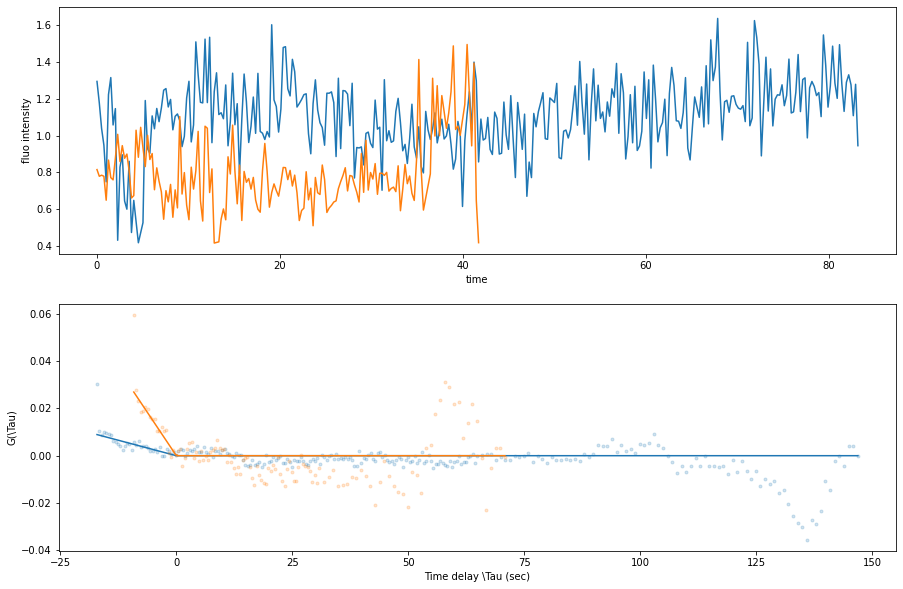

In [60]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(2,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for f in files:
    
    datas = read_csv_file(path+f)
    
    for id_track in np.unique(datas['TRACK_ID']):
        
        x, y, x_auto, y_auto, elongation_r, translation_init_r = single_track_analysis(datas, 
                                                                               id_track, 
                                                                               delta_t = DELTA_T,
                                                                               protein_size=PROTEIN_SIZE)

        
        if elongation_r>5: 
            ax[0].plot(x*0.5, y, color=colors[i])

            ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
                       y_auto, 
                       '.', 
                       color=colors[i], 
                       alpha = 0.2)
            ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
                       func_(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r), 
                       color=colors[i] )
            

        if i == 7:
            i=0
        else:
            i+=1

ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
# ax[1].set_ylim(-0.05, 0.05)

fig.set_size_inches((15,10))

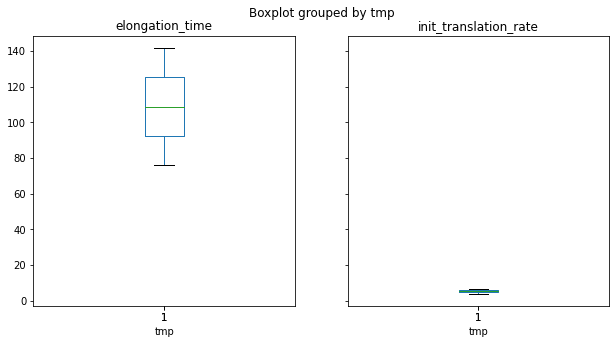

In [65]:
result['tmp'] = 1
fig, ax = result.boxplot(['elongation_time', 'init_translation_rate'] , 
#                          by='file_name', 
                         by='tmp',
                         grid=False, 
                         figsize=(10,5))


In [66]:
result.mean()

/tmp/ipykernel_68347/2046019998.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.mean()


track_id                  44.500000
len_track                123.000000
elongation_time          108.867800
init_translation_rate      5.305184
tmp                        1.000000
dtype: float64

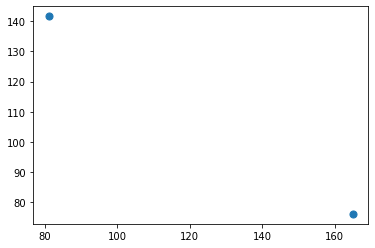

In [68]:
plt.scatter(result['len_track'], result['elongation_time'], s=50)

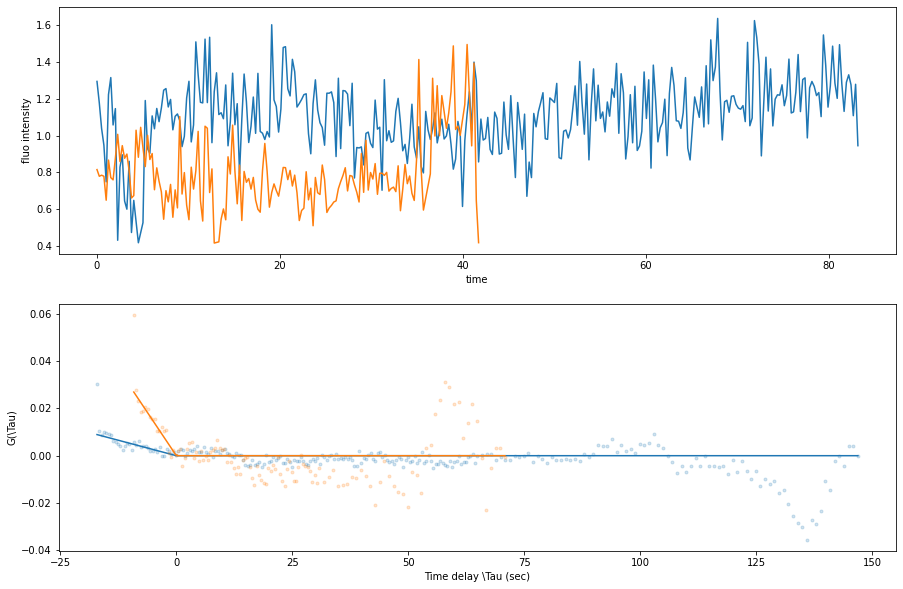

In [73]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(2,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for f in files:
    datas = read_csv_file(path+f)
    
    for id_track in np.unique(datas['TRACK_ID']):
        
        x, y, x_auto, y_auto, elongation_r, translation_init_r = single_track_analysis(datas, 
                                                                               id_track, 
                                                                               delta_t = DELTA_T,
                                                                               protein_size=PROTEIN_SIZE)

        
        if elongation_r>5: 

            ax[0].plot(x*0.5, y, color=colors[i])

            ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
                       y_auto, 
                       '.', 
                       color=colors[i], 
                       alpha = 0.2)
            ax[1].plot(x_auto-PROTEIN_SIZE/elongation_r, 
                       fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r), 
                       color=colors[i] )
        if i == 7:
            i=0
        else:
            i+=1
    



ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
# ax[1].set_ylim(-0.05, 0.05)

fig.set_size_inches((15,10))

# plot all track that was keep in result table

ValueError: zero-size array to reduction operation minimum which has no identity

> /home/u2175049/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py(86)_wrapreduction()
     84                 return reduction(axis=axis, out=out, **passkwargs)
     85 
---> 86     return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
     87 
     88 

ipdb> c


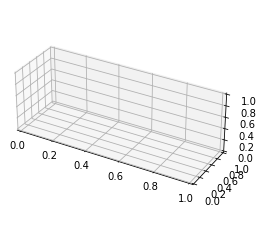

In [77]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_box_aspect(aspect = (3,1,1))


for id_ in np.unique(result['track_id']):
    x = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()))
    y = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()))
    z = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()))
    
    ax.plot(x, 
            y, 
            z, 
            '.-',
            alpha = 0.5
            )


fig.set_size_inches((15, 15))

ax.view_init(elev=10., azim=-80)

ValueError: min() arg is an empty sequence

> /tmp/ipykernel_68347/711324340.py(9)<cell line: 7>()
      7 for id_ in np.unique(result['track_id'].to_numpy()):
      8 
----> 9     x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
     10     y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values
     11 

ipdb> c


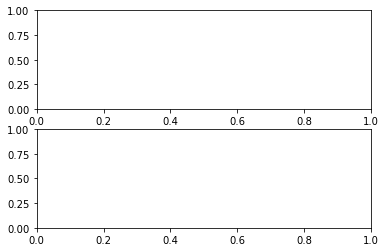

In [76]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(2,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for id_ in np.unique(result['track_id'].to_numpy()):

    x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
    y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values
    
    ax[0].plot(x*0.5, y, color=colors[i])


    mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
    print(mm)
    if (mm%2)==0: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm,
                                        deltat=0.5, 
                                        normalize=True,
                                           )
    else: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm+1,
                                        deltat=0.5,
                                        normalize=True,
                                           )



    popt, pcov = optimize.curve_fit(f=func_, 
                                    xdata=autocor.flatten()[0::2][1:],
                                    ydata=autocor.flatten()[1::2][1:],
                                    method='lm')

    print(popt)
    print(1485/popt)
    ax[1].plot(autocor.flatten()[0::2]-popt[0], autocor.flatten()[1::2], '.', color=colors[i])
    ax[1].plot(autocor.flatten()[0::2]-popt[0], func_(autocor.flatten()[0::2], *popt), color=colors[i] )
    if i == 7:
        i=0
    else:
        i+=1

ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")

fig.set_size_inches((15,10))

In [591]:
result

,file_name,track_id,len_track,elongation_time,init_translation_rate,elongation_time_norm,init_translation_rate_norm,tmp
0,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,4,126.0,36.999891,1.465089,40.135253,1.465089,1
1,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,12,83.5,17.798923,10.054277,83.432015,10.054277,1
2,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,108,94.0,27.499897,6.33738,54.000201,6.33738,1


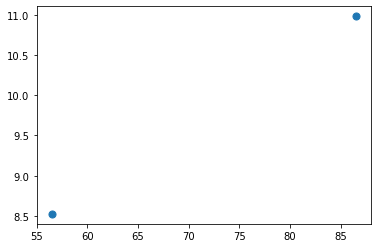

In [411]:
plt.scatter(result['len_track'], result['elongation_time'], s=50)